In [18]:
import glob
import pandas as pd
import cv2
import gc
import numpy as np
import random
import imageio
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from tensorflow_docs.vis import embed
import matplotlib.pyplot as plt

In [19]:
epochs = 10
batch_size = 60
classes = ["Normal", "Crash"]

In [50]:
def format_frames(frame, output_size):
    frame = tf.image.convert_image_dtype(frame, tf.float32)
    frame = tf.image.resize_with_pad(frame, *output_size)
    return frame

def frames_from_video_file(video_path, n_frames, output_size = (224, 224), frame_step=5):
    result = []
    src = cv2.VideoCapture(str(video_path))  
    video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

    need_length = 1 + (n_frames - 1) * frame_step

    if need_length > video_length:
        start = 0
    else:
        max_start = video_length - need_length
        start = random.randint(0, max_start + 1)

    src.set(cv2.CAP_PROP_POS_FRAMES, start)
    ret, frame = src.read()
    result.append(format_frames(frame, output_size))

    for _ in range(n_frames - 1):
        for _ in range(frame_step):
            ret, frame = src.read()
        if ret:
            frame = format_frames(frame, output_size)
            result.append(frame)
        else:
            result.append(np.zeros_like(result[0]))
    src.release()
    result = np.array(result)[..., [2, 1, 0]]

    return result

def to_gif(images):
    converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
    imageio.mimsave('./animation.gif', converted_images, duration=100)
    
    return embed.embed_file('./animation.gif')

In [22]:
file_paths = []
targets = []
for i, c in enumerate(classes):
    sub_file_paths = glob.glob(f"dataset/train/{c}/******.mp4")
    file_paths += sub_file_paths
    targets += [i] * len(sub_file_paths)

    print(file_paths)

['dataset/train/Normal\\000001.mp4', 'dataset/train/Normal\\000002.mp4', 'dataset/train/Normal\\000003.mp4', 'dataset/train/Normal\\000004.mp4', 'dataset/train/Normal\\000005.mp4', 'dataset/train/Normal\\000006.mp4', 'dataset/train/Normal\\000007.mp4', 'dataset/train/Normal\\000008.mp4', 'dataset/train/Normal\\000009.mp4', 'dataset/train/Normal\\000010.mp4', 'dataset/train/Normal\\000011.mp4', 'dataset/train/Normal\\000012.mp4', 'dataset/train/Normal\\000013.mp4', 'dataset/train/Normal\\000014.mp4', 'dataset/train/Normal\\000015.mp4', 'dataset/train/Normal\\000016.mp4', 'dataset/train/Normal\\000017.mp4', 'dataset/train/Normal\\000018.mp4', 'dataset/train/Normal\\000019.mp4', 'dataset/train/Normal\\000020.mp4', 'dataset/train/Normal\\000021.mp4', 'dataset/train/Normal\\000022.mp4', 'dataset/train/Normal\\000023.mp4', 'dataset/train/Normal\\000024.mp4', 'dataset/train/Normal\\000025.mp4', 'dataset/train/Normal\\000026.mp4', 'dataset/train/Normal\\000027.mp4', 'dataset/train/Normal\\0000

In [23]:
file_paths

['dataset/train/Normal\\000001.mp4',
 'dataset/train/Normal\\000002.mp4',
 'dataset/train/Normal\\000003.mp4',
 'dataset/train/Normal\\000004.mp4',
 'dataset/train/Normal\\000005.mp4',
 'dataset/train/Normal\\000006.mp4',
 'dataset/train/Normal\\000007.mp4',
 'dataset/train/Normal\\000008.mp4',
 'dataset/train/Normal\\000009.mp4',
 'dataset/train/Normal\\000010.mp4',
 'dataset/train/Normal\\000011.mp4',
 'dataset/train/Normal\\000012.mp4',
 'dataset/train/Normal\\000013.mp4',
 'dataset/train/Normal\\000014.mp4',
 'dataset/train/Normal\\000015.mp4',
 'dataset/train/Normal\\000016.mp4',
 'dataset/train/Normal\\000017.mp4',
 'dataset/train/Normal\\000018.mp4',
 'dataset/train/Normal\\000019.mp4',
 'dataset/train/Normal\\000020.mp4',
 'dataset/train/Normal\\000021.mp4',
 'dataset/train/Normal\\000022.mp4',
 'dataset/train/Normal\\000023.mp4',
 'dataset/train/Normal\\000024.mp4',
 'dataset/train/Normal\\000025.mp4',
 'dataset/train/Normal\\000026.mp4',
 'dataset/train/Normal\\000027.mp4',
 

In [ ]:
targets

(15, 224, 224, 3)



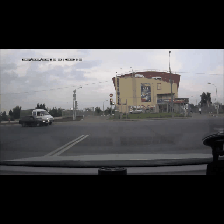

In [60]:
sample_video = frames_from_video_file(file_paths[-15], n_frames=15)
print(sample_video.shape)
to_gif(sample_video)

In [61]:
features = []
for file_path in tqdm(file_paths):
    features.append(frames_from_video_file(file_path, n_frames = 10))
features = np.array(features)

features

  0%|          | 0/600 [00:00<?, ?it/s]

array([[[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

In [62]:
train_features, val_features, train_targets, val_targets = train_test_split(features, targets, test_size=0.2, random_state=42)
train_features.shape, val_features.shape, len(train_targets), len(val_targets)

((480, 10, 224, 224, 3), (120, 10, 224, 224, 3), 480, 120)

In [63]:
train_ds = tf.data.Dataset.from_tensor_slices((train_features, train_targets)).shuffle(batch_size * 4).batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((val_features, val_targets)).batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [64]:
del train_features
del val_features
gc.collect()

731

In [65]:
for X, y in train_ds.take(1):
    print(X.shape, y.shape)

(30, 10, 224, 224, 3) (30,)


In [66]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(10, 224, 224, 3)),
    tf.keras.layers.Conv3D(32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GlobalAveragePooling3D(),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[
        "accuracy"
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 10, 224, 224, 32)  2624      
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 5, 112, 112, 32)  0         
 3D)                                                             
                                                                 
 conv3d_4 (Conv3D)           (None, 5, 112, 112, 64)   55360     
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 2, 56, 56, 64)    0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 2, 56, 56, 128)    221312    
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 1, 28, 28, 128)  

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model.h5", 
    monitor="val_accuracy",
    mode="max",
    save_best_only=True, 
    restore_best_weights=True
)
history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=valid_ds, 
    callbacks=[checkpoint]
)
model.load_weights("model.h5")